In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

from GridCal.Engine import Bus, Load, Line, Generator, MultiCircuit
from GridCal.Engine import PowerFlowOptions, PowerFlowDriver, SolverType

np.set_printoptions(precision=4)

Bentayga is not available
Newton native unavailable


In [3]:
grid = MultiCircuit()

# Add the buses and the generators and loads attached
bus1 = Bus('Bus 1', vnom=20, is_dc=True)
# bus1.is_slack = True
grid.add_bus(bus1)

gen1 = Generator('Slack Generator', voltage_module=1.0)
grid.add_generator(bus1, gen1)

bus2 = Bus('Bus 2', vnom=20)
grid.add_bus(bus2)
grid.add_load(bus2, Load('load 2', P=40, Q=0))

bus3 = Bus('Bus 3', vnom=20)
grid.add_bus(bus3)
grid.add_load(bus3, Load('load 3', P=25, Q=0))

bus4 = Bus('Bus 4', vnom=20)
grid.add_bus(bus4)
grid.add_load(bus4, Load('load 4', P=40, Q=0))

bus5 = Bus('Bus 5', vnom=20)
grid.add_bus(bus5)
grid.add_load(bus5, Load('load 5', P=50, Q=0))

# add branches (Lines in this case)
grid.add_line(Line(bus1, bus2, 'line 1-2', r=0.05, x=0, b=0))
grid.add_line(Line(bus1, bus3, 'line 1-3', r=0.05, x=0, b=0))
grid.add_line(Line(bus1, bus5, 'line 1-5', r=0.03, x=0, b=0))
grid.add_line(Line(bus2, bus3, 'line 2-3', r=0.04, x=0, b=0))
grid.add_line(Line(bus2, bus5, 'line 2-5', r=0.04, x=0, b=0))
grid.add_line(Line(bus3, bus4, 'line 3-4', r=0.06, x=0, b=0))
grid.add_line(Line(bus4, bus5, 'line 4-5', r=0.04, x=0, b=0))

In [4]:
options = PowerFlowOptions(SolverType.NR, verbose=False)
power_flow = PowerFlowDriver(grid, options)
power_flow.run()

In [5]:
print('|V|:', abs(power_flow.results.voltage))
print('|Sbranch|:', abs(power_flow.results.Sf))
print('|loading|:', abs(power_flow.results.loading) * 100)
print('err:', power_flow.results.error)
print('Conv:', power_flow.results.converged)
print('Total real losses:', sum(np.real(power_flow.results.losses)))
print('Power flow:', power_flow.results.If)

|V|: [1.     0.9787 0.9786 0.9683 0.978 ]
|Sbranch|: [42.6746 42.7101 73.4685  0.0434  1.7206 16.8415 23.3362]
|loading|: [4267.4594 4271.0102 7346.847     4.3438  172.0596 1684.1462 2333.6227]
err: 7.507994226330084e-12
Conv: True
Total real losses: 3.8531664220365154
Power flow: [ 0.4267+0.j  0.4271+0.j  0.7347+0.j  0.0004+0.j  0.0176+0.j  0.1721+0.j -0.241 +0.j]


In [6]:
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline

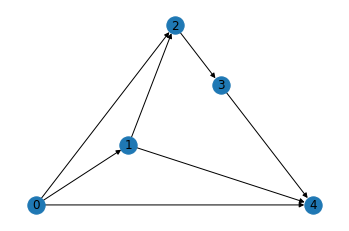

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

if grid.graph is None:
    grid.build_graph()

nx.draw(grid.graph, pos=nx.planar_layout(grid.graph), ax=ax, with_labels=True)

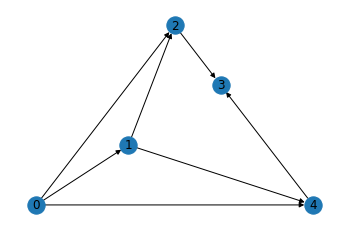

In [8]:
grid.build_graph_real_power_flow(power_flow.results.If)

fig = plt.figure()
ax = fig.add_subplot(111)
nx.draw(grid.graph_real_power_flow, pos=nx.planar_layout(grid.graph), ax=ax, with_labels=True)